In [1]:
# 2 hidden layers
# 64 and 32 neurons respectively

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('FilteredData_MorrisLecar_I0_80.csv')
data = data.dropna()

# Use "Amp" and "L" as predictors and "l3max" as the target
X = data[['Amp', 'L', 'L1', 'L2', 'p2']].values
y = data[[ 'tnextmax']].values

In [3]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Define the Deeper Neural Network model (Model Version 2)
model_v2 = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with linear activation for regression
])

C:\Users\Lawan Wijayasooriya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model using Mean Squared Error loss and Adam optimizer
model_v2.compile(optimizer='adam', loss='mse')


In [6]:
# View the model's architecture
model_v2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history_v2 = model_v2.fit(X_train, y_train, epochs=100, batch_size=32,
                          validation_split=0.1, verbose=0)

In [8]:
# Evaluate the model on the test set
y_pred_v2 = model_v2.predict(X_test).flatten()
mse_v2 = mean_squared_error(y_test, y_pred_v2)
r2_v2 = r2_score(y_test, y_pred_v2)
print("Deeper NN - Mean Squared Error: {:.2f}".format(mse_v2))
print("Deeper NN - R^2 Score: {:.5f}".format(r2_v2))


1130/1130 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Deeper NN - Mean Squared Error: 0.12
Deeper NN - R^2 Score: 0.99983


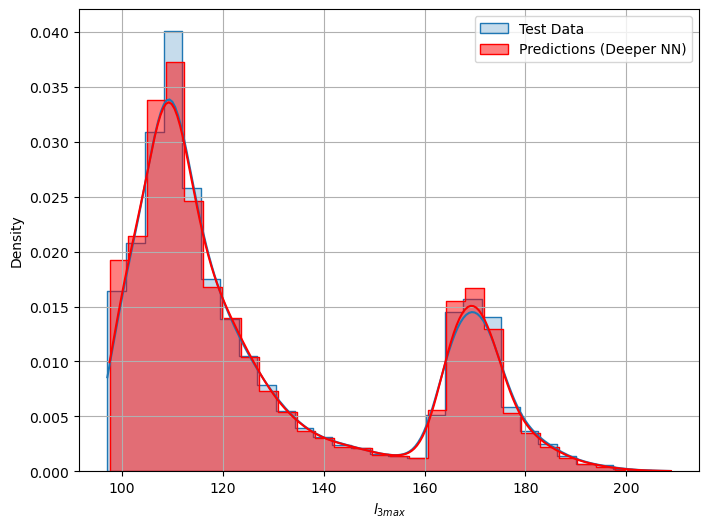

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(y_test, bins=30, kde=True, color='blue', label='Test Data', stat='density', element="step")
sns.histplot(y_pred_v2, bins=30, kde=True, color='red', label='Predictions (Deeper NN)', stat='density', element="step")
plt.xlabel(r'$l_{3max}$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('Deeper_NN_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


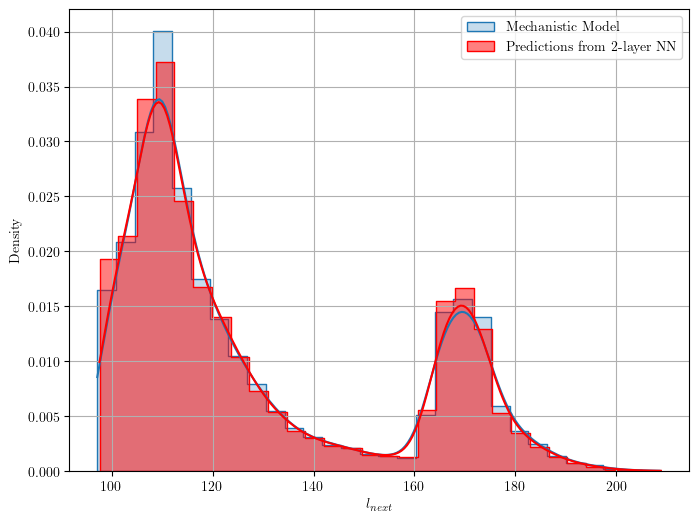

In [10]:
import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns

#
mpl.rcParams['text.usetex'] = True                       # Enable full LaTeX rendering
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']   # Use LaTeX default font
mpl.rcParams['axes.formatter.use_mathtext'] = False      # Disable mathtext formatting so LaTeX is used for all text
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath for \text
# 
################
plt.figure(figsize=(8,6))
sns.histplot(y_test, bins=30, kde=True, color='blue', label='Mechanistic Model', stat='density', element="step")
sns.histplot(y_pred_v2, bins=30, kde=True, color='red', label='Predictions from 2-layer NN', stat='density', element="step")
plt.xlabel(r'$l_{next}$')
plt.ylabel(r'$\text{Density}$')
plt.legend()
plt.grid(True)
plt.savefig('2layer_NN_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
